# Part 1: Feature Engineering

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from pyod.models.iforest import IForest
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/Users/judy/Desktop/cu/anomaly detection/health_data_clustering.csv")

In [3]:
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,...,avg covered charges/Average_Covered_Charges_by_Hospital,Minimum_Medicare_Payment_by_Hospital,Median_Medicare_Payment_by_Hospital,Average_Medicare_Payment_by_Hospital,Maximum_Medicare_Payment_by_Hospital,STD_Medicare_Payment_by_Hospital,SUM_of_Medicare_Payment_by_Hospital,avg medicare payment/Average_Medicare_Payment_by_Hospital,charge/medicare ratio,percentage of medciare payment to total payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,...,0.935201,2093.38,5683.385,7678.214348,32095.75,5990.735366,706395.72,0.620422,1.212756,0.824568
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,...,0.919808,2467.15,4976.710,5793.631429,13342.72,2784.451480,283887.94,0.858997,1.162931,0.859896
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,...,1.016729,1704.53,5228.300,7145.959535,32248.64,5636.247698,614552.52,0.623260,1.220298,0.819472
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,...,0.504304,2076.82,4842.360,6810.429310,29393.46,5032.249163,592507.35,0.606300,1.312025,0.762181
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,...,0.796244,2116.02,5183.575,6563.419000,29031.62,4435.211822,525073.52,0.739164,1.166320,0.857398


In [4]:
features = ['total discharge/Average_Total_Discharge_by_DRG_definition ratio',
       'avg total payments/Average_Total_Payment_by_DRG_definition',
       'avg total payments/Average_Total_Payment_by_DRG_definition_by_State',
       'avg covered charges/Average_Average_Covered_charges_by_DRG_definition_by_State',
       'avg medicare payment/Average_Average_Medicare_Payments_by_DRG_definition_by_State',
       'total_discharges/Average_Total_Discharge_by_Hospital',
       'avg total payment/Average_Total_Payment_by_Hospital',
       'avg covered charges/Average_Covered_Charges_by_Hospital',
       'avg medicare payment/Average_Medicare_Payment_by_Hospital',
       'charge/medicare ratio',
       'percentage of medciare payment to total payment']

In [5]:
df_clustering = df[features]

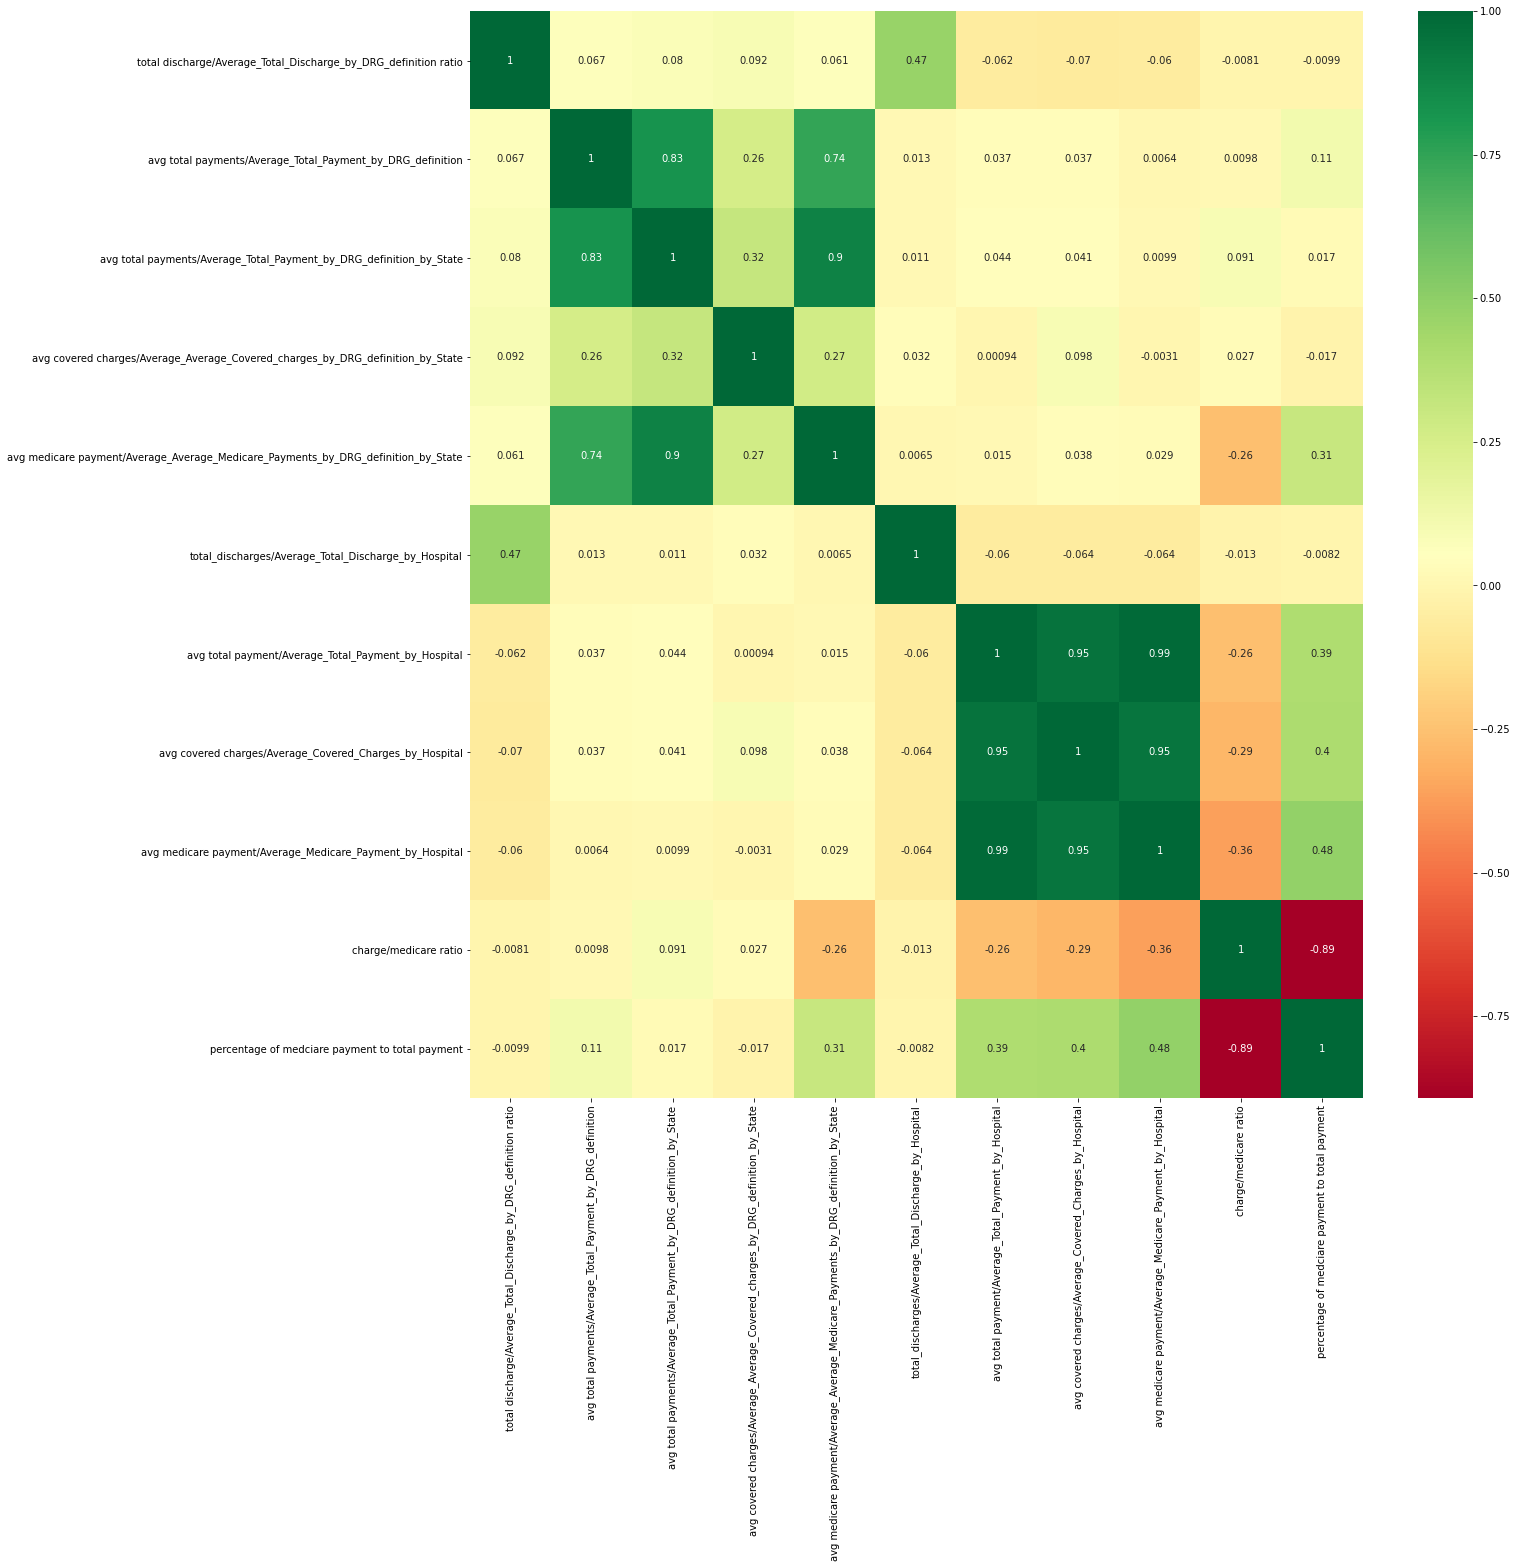

In [6]:
# Correlation Matrix with Heatmap
X = df_clustering.iloc[::]  #independent columns
y = df_clustering.iloc[::]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df_clustering.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_clustering[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [7]:
columns = np.full((corrmat.shape[0],), True, dtype=bool)
for i in range(corrmat.shape[0]):
    for j in range(i+1, corrmat.shape[0]):
        if corrmat.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df_clustering.columns[columns]
data = df_clustering[selected_columns]

In [8]:
data.head()

,total discharge/Average_Total_Discharge_by_DRG_definition ratio,avg total payments/Average_Total_Payment_by_DRG_definition,avg total payments/Average_Total_Payment_by_DRG_definition_by_State,avg covered charges/Average_Average_Covered_charges_by_DRG_definition_by_State,avg medicare payment/Average_Average_Medicare_Payments_by_DRG_definition_by_State,total_discharges/Average_Total_Discharge_by_Hospital,avg total payment/Average_Total_Payment_by_Hospital,charge/medicare ratio,percentage of medciare payment to total payment
0,2.921770,0.830000,1.005855,1.028667,1.035685,1.548936,0.660330,1.212756,0.824568
1,0.449503,0.831484,1.007653,0.472215,1.081989,0.483439,0.849598,1.162931,0.859896
2,0.770577,0.780824,0.946260,1.172134,0.968301,0.529095,0.663022,1.220298,0.819472
3,0.802684,0.778325,0.943232,0.436840,0.897723,0.745629,0.662160,1.312025,0.762181
4,0.577933,0.812916,0.985152,0.987169,1.054754,0.571655,0.726413,1.166320,0.857398


In [11]:
standardized_data = preprocessing.scale(data)

In [12]:
print(standardized_data)

[[ 2.52841218 -0.68477316  0.02998315 ... -0.49906783  0.09263843
  -0.24998292]
 [-0.72427148 -0.67879518  0.03919344 ... -0.22098192 -0.20071286
   0.15187496]
 [-0.30184503 -0.88285665 -0.27520458 ... -0.49511176  0.13704458
  -0.30795457]
 ...
 [-0.42655941  0.73434877  1.18693404 ... -0.54837355  1.22794162
  -1.53673215]
 [-0.80092113  2.36963925  3.35292857 ... -0.46173141 -0.45973047
   0.53645004]
 [-0.75412592 -1.07282532 -1.20672585 ... -0.6986666   0.17017977
  -0.35074742]]


In [34]:
from sklearn import model_selection

# Reserve 25% for testing
X_train, X_test = model_selection.train_test_split(standardized_data, test_size=0.25, random_state=1)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 122298 observation with 9 features
test data has 40767 observation with 9 features


# Part 2: Modeling with unsupervised learning algorithms

# Model 1:  I Forest

## IFOREST MODEL 1

In [35]:
clf1 = IForest(behaviour="new", max_samples=60) 
clf1.fit(X_train)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples=60, n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

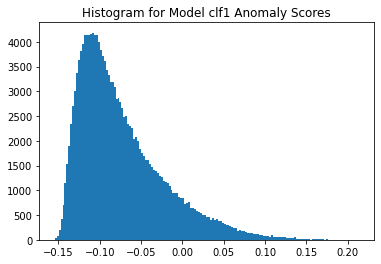

In [37]:
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
X_test_scores = clf1.decision_function(standardized_data)  # outlier scores
X_test_scores = pd.DataFrame(X_test_scores)
X_test_scores.head()

plt.hist(X_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Model clf1 Anomaly Scores")
plt.show()

In [38]:
X_test_cluster = standardized_data.copy()
X_test_cluster = pd.DataFrame(X_test_cluster)
X_test_cluster['distance'] = X_test_scores
X_test_cluster['cluster'] = np.where(X_test_cluster['distance']<0.1, 0, 1)
X_test_cluster['cluster'].value_counts()

0    161944
1      1121
Name: cluster, dtype: int64

In [39]:
X_test_cluster.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,8,distance
cluster,,,,,,,,,,
0,-0.004530,-0.025814,-0.027781,-0.017030,-0.019356,-0.004042,-0.010304,-0.010349,0.003342,-0.074855
1,0.654351,3.729167,4.013373,2.460165,2.796289,0.583905,1.488562,1.495036,-0.482866,0.124614


## IFOREST MODEL 2

In [40]:
clf2 = IForest(behaviour="new", max_samples=80) 
clf2.fit(X_train)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples=80, n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

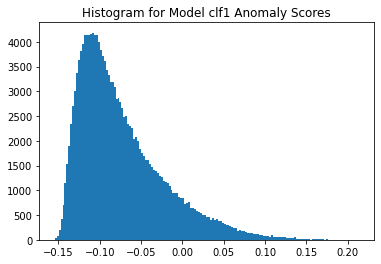

In [41]:
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
X_test_scores = clf1.decision_function(standardized_data)  # outlier scores
X_test_scores = pd.DataFrame(X_test_scores)
X_test_scores.head()

plt.hist(X_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Model clf1 Anomaly Scores")
plt.show()

In [42]:
X_test_cluster = standardized_data.copy()
X_test_cluster = pd.DataFrame(X_test_cluster)
X_test_cluster['distance'] = X_test_scores
X_test_cluster['cluster'] = np.where(X_test_cluster['distance']<0.1, 0, 1)
X_test_cluster['cluster'].value_counts()

0    161944
1      1121
Name: cluster, dtype: int64

In [43]:
X_test_cluster.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,8,distance
cluster,,,,,,,,,,
0,-0.004530,-0.025814,-0.027781,-0.017030,-0.019356,-0.004042,-0.010304,-0.010349,0.003342,-0.074855
1,0.654351,3.729167,4.013373,2.460165,2.796289,0.583905,1.488562,1.495036,-0.482866,0.124614


## IFOREST MODEL 3

In [44]:
clf3 = IForest(behaviour="new", max_samples=100) 
clf3.fit(X_train)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples=100, n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

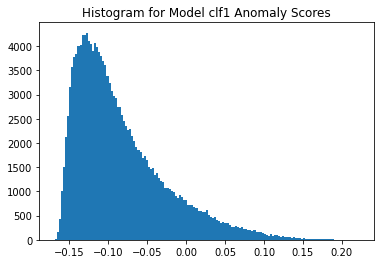

In [45]:
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
X_test_scores = clf3.decision_function(standardized_data)  # outlier scores
X_test_scores = pd.DataFrame(X_test_scores)
X_test_scores.head()

plt.hist(X_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Model clf1 Anomaly Scores")
plt.show()

In [46]:
X_test_cluster = standardized_data.copy()
X_test_cluster = pd.DataFrame(X_test_cluster)
X_test_cluster['distance'] = X_test_scores
X_test_cluster['cluster'] = np.where(X_test_cluster['distance']<0.15, 0, 1)
X_test_cluster['cluster'].value_counts()

0    162822
1       243
Name: cluster, dtype: int64

In [47]:
X_test_cluster.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,8,distance
cluster,,,,,,,,,,
0,-0.000709,-0.008574,-0.009192,-0.003770,-0.004188,-0.000185,-0.003507,-0.007845,0.003138,-0.084521
1,0.474846,5.744986,6.159080,2.525882,2.806493,0.124260,2.349794,5.256584,-2.102865,0.169654


## Aggregate to Achieve Model Stability

In [48]:
#Aggregate to achieve model stability
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer

# The predictions of the training data can be obtained by clf.decision_scores_.
# It is already generated during the model building process.
train_scores = pd.DataFrame({'clf1': clf1.decision_scores_,
                             'clf2': clf2.decision_scores_,
                             'clf3': clf3.decision_scores_
                            })

# The predictions of the test data need to be predicted using clf.decision_function(X_test)
test_scores  = pd.DataFrame({'clf1': clf1.decision_function(standardized_data),
                             'clf2': clf2.decision_function(standardized_data),
                             'clf3': clf3.decision_function(standardized_data) 
                            })

/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [49]:
#standardization for the decision scores
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)
train_scores_norm.shape

(122298, 3)

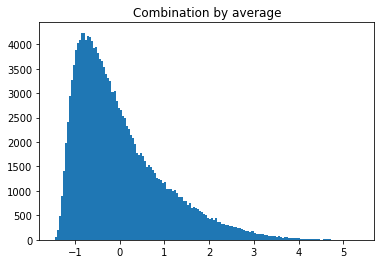

In [50]:
# Combination by average
x_by_average = average(test_scores_norm)
             
import matplotlib.pyplot as plt
plt.hist(x_by_average, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

In [54]:
df_test = standardized_data.copy()
df_test = pd.DataFrame(df_test)
df_test['x_by_average_score'] = x_by_average
df_test['x_by_average_cluster'] = np.where(df_test['x_by_average_score']<4, 0, 1)
df_test['x_by_average_cluster'].value_counts()

0    162837
1       228
Name: x_by_average_cluster, dtype: int64

In [55]:
df_test.groupby('x_by_average_cluster').mean().round(2)

,0,1,2,3,4,5,6,7,8,x_by_average_score
x_by_average_cluster,,,,,,,,,,
0,-0.00,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00,-0.01,0.00,-0.01
1,0.53,5.75,6.18,2.85,2.94,0.28,2.38,5.12,-1.96,4.34


# Isolated Forest is an anomaly detection algorithm that find the norm first, and then identify observations that do not conform to the norm. This model explicitly isolates anomalies instead of profiling normal data points, exposing outliers that usually have short path lenths on a tree. In this case, I have built three models and aggregated the statistics to achieve model stability. On the chart above, cluster 1 is identified as the anomalous cluster, that counts for 0.14% of the entire dataset. Cluster 1 has a much higher number in average total payments that are represented by column 1,2,and 7 compared to cluster0. Cluster 1 also has a very high x_by_average_score and this suggests that this group of points are much farther away from the forest, that is the norm. This is anomalous and needs to be further investigated. 

# Model 2:  Autoencoders

In [60]:
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data

### Model 1: [25, 2, 2, 25]. The input layer and the output layer has 25 neurons each. There are two hidden layers, each has two neurons.

In [66]:
clf1 = AutoEncoder(hidden_neurons =[25, 2, 2, 25],epochs=10)
clf1.fit(X_train)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 9)                 90        
_________________________________________________________________
dropout_6 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 9)                 90        
_________________________________________________________________
dropout_7 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 25)                250       
_________________________________________________________________
dropout_8 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=10,
      hidden_activation='relu', hidden_neurons=[25, 2, 2, 25],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x13936daf0>, optimizer='adam',
      output_activation='sigmoid', preprocessing=True, random_state=None,
      validation_size=0.1, verbose=1)

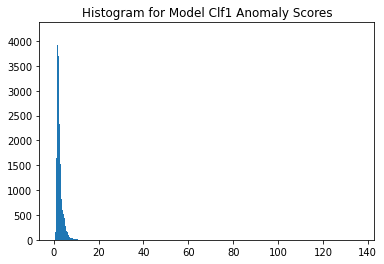

In [69]:
# Get the outlier scores for the train data
x_train_scores = clf1.decision_scores_  

# Predict the anomaly scores
x_test_scores = clf1.decision_function(standardized_data)  # outlier scores
x_test_scores = pd.Series(x_test_scores)

# Plot it!
import matplotlib.pyplot as plt
plt.hist(x_test_scores, bins='auto')  
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()

In [70]:
standardized_data = pd.DataFrame(standardized_data)
df_test = standardized_data.copy()
df_test['score'] = x_test_scores
df_test['cluster'] = np.where(df_test['score']<10, 0, 1)
df_test['cluster'].value_counts()

0    162448
1       617
Name: cluster, dtype: int64

In [71]:
df_test.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,8,score
cluster,,,,,,,,,,
0,-0.007999,-0.014071,-0.015126,-0.005285,-0.008937,-0.011499,-0.003166,-0.012027,0.004802,2.535563
1,2.106022,3.704751,3.982487,1.391500,2.353019,3.027535,0.833587,3.166511,-1.264327,13.810173


### Model 2: [25, 10, 2, 10, 25]. Besides the input layer and output layers, there are three hidden layers with 10, 2, and 10 neurons respectively.

In [72]:
# Step 1: Build the model
clf2 = AutoEncoder(hidden_neurons =[25, 15, 10, 2, 10,15, 25],epochs=10)
clf2.fit(X_train)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 9)                 90        
_________________________________________________________________
dropout_12 (Dropout)         (None, 9)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 9)                 90        
_________________________________________________________________
dropout_13 (Dropout)         (None, 9)                 0         
_________________________________________________________________
dense_16 (Dense)             (None, 25)                250       
_________________________________________________________________
dropout_14 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 15)               

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=10,
      hidden_activation='relu', hidden_neurons=[25, 15, 10, 2, 10, 15, 25],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x13936daf0>, optimizer='adam',
      output_activation='sigmoid', preprocessing=True, random_state=None,
      validation_size=0.1, verbose=1)

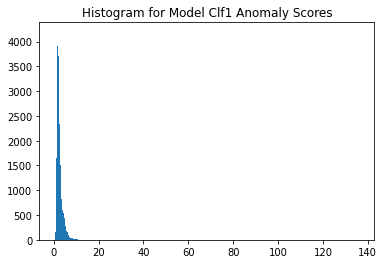

In [73]:
# Get the outlier scores for the train data
x_train_scores = clf2.decision_scores_  

# Predict the anomaly scores
x_test_scores = clf2.decision_function(standardized_data)  # outlier scores
x_test_scores = pd.Series(x_test_scores)

# Plot it!
import matplotlib.pyplot as plt
plt.hist(x_test_scores, bins='auto')  
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()

In [74]:
standardized_data = pd.DataFrame(standardized_data)
df_test = standardized_data.copy()
df_test['score'] = x_test_scores
df_test['cluster'] = np.where(df_test['score']<10, 0, 1)
df_test['cluster'].value_counts()

0    162447
1       618
Name: cluster, dtype: int64

In [75]:
df_test.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,8,score
cluster,,,,,,,,,,
0,-0.008002,-0.014097,-0.015161,-0.005302,-0.008954,-0.011496,-0.003200,-0.012035,0.004812,2.535448
1,2.103379,3.705510,3.985301,1.393561,2.353692,3.021811,0.841147,3.163572,-1.264959,13.804202


### Model 3: [25, 15, 10, 2, 10, 15, 25]. There are five hidden layers with 15, 10, 2, 10, 15 neurons respectively.

In [76]:
# Step 1: Build the model
clf3 = AutoEncoder(hidden_neurons =[25, 15, 10, 2, 10,15, 25],epochs=10)
clf3.fit(X_train)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 9)                 90        
_________________________________________________________________
dropout_21 (Dropout)         (None, 9)                 0         
_________________________________________________________________
dense_25 (Dense)             (None, 9)                 90        
_________________________________________________________________
dropout_22 (Dropout)         (None, 9)                 0         
_________________________________________________________________
dense_26 (Dense)             (None, 25)                250       
_________________________________________________________________
dropout_23 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 15)               

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=10,
      hidden_activation='relu', hidden_neurons=[25, 15, 10, 2, 10, 15, 25],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x13936daf0>, optimizer='adam',
      output_activation='sigmoid', preprocessing=True, random_state=None,
      validation_size=0.1, verbose=1)

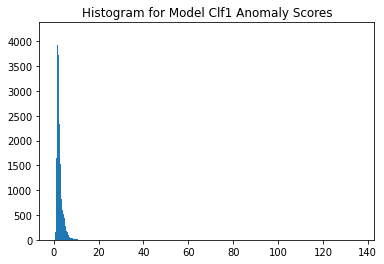

In [77]:
# Get the outlier scores for the train data
x_train_scores = clf3.decision_scores_  

# Predict the anomaly scores
x_test_scores = clf3.decision_function(standardized_data)  # outlier scores
x_test_scores = pd.Series(x_test_scores)

# Plot it!
import matplotlib.pyplot as plt
plt.hist(x_test_scores, bins='auto')  
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()

In [78]:
standardized_data = pd.DataFrame(standardized_data)
df_test = standardized_data.copy()
df_test['score'] = x_test_scores
df_test['cluster'] = np.where(df_test['score']<10, 0, 1)
df_test['cluster'].value_counts()

0    162448
1       617
Name: cluster, dtype: int64

In [79]:
df_test.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,8,score
cluster,,,,,,,,,,
0,-0.007999,-0.014071,-0.015126,-0.005285,-0.008937,-0.011499,-0.003166,-0.012027,0.004802,2.535602
1,2.106022,3.704751,3.982487,1.391500,2.353019,3.027535,0.833587,3.166511,-1.264327,13.810002


### Aggregate to Achieve Model Stability

In [80]:
# Put all the predictions in a data frame
from pyod.models.combination import aom, moa, average, maximization

# Put all the predictions in a data frame
train_scores = pd.DataFrame({'clf1': clf1.decision_scores_,
                             'clf2': clf2.decision_scores_,
                             'clf3': clf3.decision_scores_
                            })

test_scores  = pd.DataFrame({'clf1': clf1.decision_function(standardized_data),
                             'clf2': clf2.decision_function(standardized_data),
                             'clf3': clf3.decision_function(standardized_data) 
                            })

In [81]:
# Although we did standardization before, it was for the variables.
# Now we do the standardization for the decision scores
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

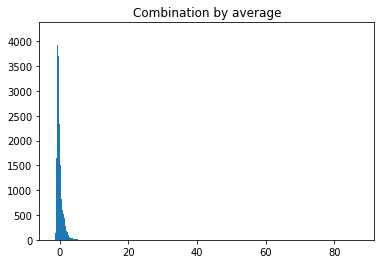

In [82]:
#Average method
# Combination by average
x_by_average = average(test_scores_norm)
             
import matplotlib.pyplot as plt
plt.hist(x_by_average, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

In [90]:
df_test = data.copy()
df_test = pd.DataFrame(df_test)
df_test['x_by_average_score'] = x_by_average
df_test['x_by_average_cluster'] = np.where(df_test['x_by_average_score']<6, 0, 1)
df_test['x_by_average_cluster'].value_counts()

0    162738
1       327
Name: x_by_average_cluster, dtype: int64

In [91]:
df_test.groupby('x_by_average_cluster').mean().round(2)

,total discharge/Average_Total_Discharge_by_DRG_definition ratio,avg total payments/Average_Total_Payment_by_DRG_definition,avg total payments/Average_Total_Payment_by_DRG_definition_by_State,avg covered charges/Average_Average_Covered_charges_by_DRG_definition_by_State,avg medicare payment/Average_Average_Medicare_Payments_by_DRG_definition_by_State,total_discharges/Average_Total_Discharge_by_Hospital,avg total payment/Average_Total_Payment_by_Hospital,charge/medicare ratio,percentage of medciare payment to total payment,x_by_average_score
x_by_average_cluster,,,,,,,,,,
0,1.00,1.00,1.00,1.00,1.00,0.99,1.00,1.20,0.85,-0.02
1,2.75,2.14,1.94,1.59,1.55,4.28,1.67,1.98,0.70,9.11


# Autoencoders is an unsupervised learning algorithm adapted from artificial Neural Network. In this case, the hidden core layer is our point of interests. If the number of neurons in the hidden layers is less than that of the input layers, the hidden layers will extract the essential information of the input values. If the number of neurons in the hidden layers is less than that of the input layers, the hidden layers will extract the essential information of the input values. By employing dimension reduction, the main patterns are dentified and the outliers are revealed. In this project,  I have built three models and aggregated the statistics to achieve model stability as unsupervised techniques are very prone to overfitting and unstable results. On the chart above, cluster 1 is identified as the anomalous cluster, that counts for 0.2% of the entire dataset. Cluster 1 has a much higher number in total charges and average total payments that are represented by column5, column 1,2,and 7 compared to cluster0. Cluster 1 also has a very high x_by_average_score and this suggests that this group of points have a very high anomaly score. This is anomalous and needs to be further investigated. 